In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
proyeccion=pd.read_csv(r"C:\Users\GPSantana\Downloads\Proyeccion poblacion 2024-2070.csv",sep=';')

proyeccion

,Sexo,Edad,Periodo,Total
0,Total,Todas las edades,2074,"54.588.194,555989"
1,Total,Todas las edades,2073,"54.572.174,746164"
2,Total,Todas las edades,2072,"54.562.643,062856"
3,Total,Todas las edades,2071,"54.559.822,359944"
4,Total,Todas las edades,2070,"54.563.560,694023"
...,...,...,...,...
15601,Mujeres,100 y más años,2028,"18.428,194035"
15602,Mujeres,100 y más años,2027,"17.109,552053"
15603,Mujeres,100 y más años,2026,"15.758,526083"
15604,Mujeres,100 y más años,2025,"14.686,924427"


In [3]:
proyeccion["Total_num"] = proyeccion["Total"].str.replace(".", "", regex=False)

proyeccion["Total_num"] = proyeccion["Total_num"].str.replace(",", ".", regex=False)

proyeccion["Total_num"] = pd.to_numeric(proyeccion["Total_num"], errors="coerce")



In [4]:
proyeccion['Edad'] = proyeccion['Edad'].str.replace("años", "", regex=False).str.strip()

proyeccion['Edad_num'] = pd.to_numeric(proyeccion['Edad'], errors='coerce')

In [5]:
df_filtrado = proyeccion[(proyeccion['Edad_num'] >= 16) & (proyeccion['Edad_num'] <= 65)]

df_filtrado

,Sexo,Edad,Periodo,Total,Total_num,Edad_num
867,Total,16,2074,"439.407,6091",439407.609100,16.0
868,Total,16,2073,"439.893,306338",439893.306338,16.0
869,Total,16,2072,"441.076,576543",441076.576543,16.0
870,Total,16,2071,"442.915,133234",442915.133234,16.0
871,Total,16,2070,"445.350,196189",445350.196189,16.0
...,...,...,...,...,...,...
13816,Mujeres,65,2028,"340.378,694154",340378.694154,65.0
13817,Mujeres,65,2027,"331.585,119884",331585.119884,65.0
13818,Mujeres,65,2026,"330.954,57367",330954.573670,65.0
13819,Mujeres,65,2025,"320.065,136076",320065.136076,65.0


In [6]:
df_total = df_filtrado[df_filtrado["Sexo"] == "Total"]

total_por_periodo = df_total.groupby("Periodo")["Total_num"].sum().reset_index()

total_por_periodo

,Periodo,Total_num
0,2024,3.231814e+07
1,2025,3.282107e+07
2,2026,3.328635e+07
3,2027,3.369152e+07
4,2028,3.403625e+07
5,2029,3.429940e+07
6,2030,3.446339e+07
7,2031,3.455301e+07
8,2032,3.460599e+07
9,2033,3.461348e+07


In [7]:
afiliados=pd.read_csv(r"C:\Users\GPSantana\Downloads\total_afiliados_2017-25.csv",sep=';',encoding='latin1',header=1)

afiliados

,Periodo,CNAE dos dígitos,Total Regimenes(RG+RETA) Total Sexo
0,201701,Total CNAEs (RG+RETA),16323545
1,201801,Total CNAEs (RG+RETA),16944707
2,201901,Total CNAEs (RG+RETA),17469419
3,202001,Total CNAEs (RG+RETA),17842273
4,202101,Total CNAEs (RG+RETA),17610958
5,202201,Total CNAEs (RG+RETA),18367633
6,202301,Total CNAEs (RG+RETA),18880332
7,202401,Total CNAEs (RG+RETA),19429775
8,202501,Total CNAEs (RG+RETA),19919422


In [8]:
afiliados["Periodo"] = afiliados["Periodo"] // 100

afiliados=afiliados.rename(columns={"Total Regimenes(RG+RETA) Total Sexo": "Total afiliados"})

afiliados=afiliados[["Periodo","Total afiliados"]]

afiliados

,Periodo,Total afiliados
0,2017,16323545
1,2018,16944707
2,2019,17469419
3,2020,17842273
4,2021,17610958
5,2022,18367633
6,2023,18880332
7,2024,19429775
8,2025,19919422


In [9]:
df_merged = (
    total_por_periodo
    .merge(afiliados, on="Periodo", how="left")
)

df_merged

,Periodo,Total_num,Total afiliados
0,2024,3.231814e+07,19429775.0
1,2025,3.282107e+07,19919422.0
2,2026,3.328635e+07,NaN
3,2027,3.369152e+07,NaN
4,2028,3.403625e+07,NaN
5,2029,3.429940e+07,NaN
6,2030,3.446339e+07,NaN
7,2031,3.455301e+07,NaN
8,2032,3.460599e+07,NaN
9,2033,3.461348e+07,NaN


In [10]:
valor_inicial = 2259.30 * 12
tasa = 0.033  

df_merged["Cotizacion_media"] = valor_inicial * (1 + tasa) ** (df_merged["Periodo"] - 2024).round(2)

df_merged["Cotizacion_media"]=df_merged["Cotizacion_media"].round(2)

df_merged

,Periodo,Total_num,Total afiliados,Cotizacion_media
0,2024,3.231814e+07,19429775.0,27111.60
1,2025,3.282107e+07,19919422.0,28006.28
2,2026,3.328635e+07,NaN,28930.49
3,2027,3.369152e+07,NaN,29885.20
4,2028,3.403625e+07,NaN,30871.41
5,2029,3.429940e+07,NaN,31890.16
6,2030,3.446339e+07,NaN,32942.54
7,2031,3.455301e+07,NaN,34029.64
8,2032,3.460599e+07,NaN,35152.62
9,2033,3.461348e+07,NaN,36312.66


In [11]:
ingresos_dec= {
    2017: 127399419636.49,
    2018: 135153363473.86,
    2019: 145651422963.14,
    2020: 176508941502.42,
    2021: 178041089643.96,
    2022: 185870736269.79,
    2023: 200454098590.00,
    2024: 216095569105.56,
}

gastos_decl={
    2017:-152825031866.41,
    2018:-160437621256.35,
    2019:-169427908093.97,
    2020:-196145889561.58,
    2021:-197068576088.26,
    2022:-199772531634.34,
    2023:-218909281595.56,
    2024:-232454011959.20,
}

df_merged["Ingresos_dec"] = df_merged["Periodo"].map(ingresos_dec)
df_merged["Gastos_dec"] = df_merged["Periodo"].map(gastos_decl)

df_merged

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec
0,2024,3.231814e+07,19429775.0,27111.60,2.160956e+11,-2.324540e+11
1,2025,3.282107e+07,19919422.0,28006.28,NaN,NaN
2,2026,3.328635e+07,NaN,28930.49,NaN,NaN
3,2027,3.369152e+07,NaN,29885.20,NaN,NaN
4,2028,3.403625e+07,NaN,30871.41,NaN,NaN
5,2029,3.429940e+07,NaN,31890.16,NaN,NaN
6,2030,3.446339e+07,NaN,32942.54,NaN,NaN
7,2031,3.455301e+07,NaN,34029.64,NaN,NaN
8,2032,3.460599e+07,NaN,35152.62,NaN,NaN
9,2033,3.461348e+07,NaN,36312.66,NaN,NaN


In [12]:
df_merged['ayuda'] = df_merged['Ingresos_dec'] - (df_merged['Total afiliados'] * df_merged['Cotizacion_media'])

df_merged

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda
0,2024,3.231814e+07,19429775.0,27111.60,2.160956e+11,-2.324540e+11,-3.106767e+11
1,2025,3.282107e+07,19919422.0,28006.28,NaN,NaN,NaN
2,2026,3.328635e+07,NaN,28930.49,NaN,NaN,NaN
3,2027,3.369152e+07,NaN,29885.20,NaN,NaN,NaN
4,2028,3.403625e+07,NaN,30871.41,NaN,NaN,NaN
5,2029,3.429940e+07,NaN,31890.16,NaN,NaN,NaN
6,2030,3.446339e+07,NaN,32942.54,NaN,NaN,NaN
7,2031,3.455301e+07,NaN,34029.64,NaN,NaN,NaN
8,2032,3.460599e+07,NaN,35152.62,NaN,NaN,NaN
9,2033,3.461348e+07,NaN,36312.66,NaN,NaN,NaN


In [13]:

df = df_merged.copy()

ratio = (df['Total afiliados'] / df['Total_num']).mean()

tasa = 2.5322448676083544 / 100

for i in range(1, len(df)):
    if np.isnan(df.loc[i, 'Total afiliados']):
        
        crecimiento = df.loc[i-1, 'Total afiliados'] * (1 + tasa)

        
        ajuste_ratio = df.loc[i, 'Total_num'] * ratio

        df.loc[i, 'Total afiliados'] = (crecimiento + ajuste_ratio) / 2


df['Total afiliados'] = df['Total afiliados'].round().astype(int)


In [14]:
df

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,-2.324540e+11,-3.106767e+11
1,2025,3.282107e+07,19919422,28006.28,NaN,NaN,NaN
2,2026,3.328635e+07,20265334,28930.49,NaN,NaN,NaN
3,2027,3.369152e+07,20565043,29885.20,NaN,NaN,NaN
4,2028,3.403625e+07,20822810,30871.41,NaN,NaN,NaN
5,2029,3.429940e+07,21034436,31890.16,NaN,NaN,NaN
6,2030,3.446339e+07,21192455,32942.54,NaN,NaN,NaN
7,2031,3.455301e+07,21300534,34029.64,NaN,NaN,NaN
8,2032,3.460599e+07,21371945,35152.62,NaN,NaN,NaN
9,2033,3.461348e+07,21410817,36312.66,NaN,NaN,NaN


In [15]:
X = np.array(list(ingresos_dec.keys())).reshape(-1, 1)
y = np.array(list(ingresos_dec.values()))

model = LinearRegression()
model.fit(X, y)

mask = df['Ingresos_dec'].isna()
df.loc[mask, 'Ingresos_dec'] = model.predict(df.loc[mask, 'Periodo'].values.reshape(-1, 1))

df

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,-2.324540e+11,-3.106767e+11
1,2025,3.282107e+07,19919422,28006.28,2.279451e+11,NaN,NaN
2,2026,3.328635e+07,20265334,28930.49,2.406780e+11,NaN,NaN
3,2027,3.369152e+07,20565043,29885.20,2.534109e+11,NaN,NaN
4,2028,3.403625e+07,20822810,30871.41,2.661439e+11,NaN,NaN
5,2029,3.429940e+07,21034436,31890.16,2.788768e+11,NaN,NaN
6,2030,3.446339e+07,21192455,32942.54,2.916097e+11,NaN,NaN
7,2031,3.455301e+07,21300534,34029.64,3.043427e+11,NaN,NaN
8,2032,3.460599e+07,21371945,35152.62,3.170756e+11,NaN,NaN
9,2033,3.461348e+07,21410817,36312.66,3.298086e+11,NaN,NaN


In [16]:
X = np.array(list(gastos_decl.keys())).reshape(-1, 1)
y = np.array(list(gastos_decl.values()))

model = LinearRegression()
model.fit(X, y)

mask = df['Gastos_dec'].isna()
df.loc[mask, 'Gastos_dec'] = model.predict(df.loc[mask, 'Periodo'].values.reshape(-1, 1))

df

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,-2.324540e+11,-3.106767e+11
1,2025,3.282107e+07,19919422,28006.28,2.279451e+11,-2.413293e+11,NaN
2,2026,3.328635e+07,20265334,28930.49,2.406780e+11,-2.525402e+11,NaN
3,2027,3.369152e+07,20565043,29885.20,2.534109e+11,-2.637511e+11,NaN
4,2028,3.403625e+07,20822810,30871.41,2.661439e+11,-2.749620e+11,NaN
5,2029,3.429940e+07,21034436,31890.16,2.788768e+11,-2.861730e+11,NaN
6,2030,3.446339e+07,21192455,32942.54,2.916097e+11,-2.973839e+11,NaN
7,2031,3.455301e+07,21300534,34029.64,3.043427e+11,-3.085948e+11,NaN
8,2032,3.460599e+07,21371945,35152.62,3.170756e+11,-3.198057e+11,NaN
9,2033,3.461348e+07,21410817,36312.66,3.298086e+11,-3.310167e+11,NaN


In [17]:
df['ayuda'] = df['Ingresos_dec'] - (df['Total afiliados'] * df['Cotizacion_media'])

df

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,-2.324540e+11,-3.106767e+11
1,2025,3.282107e+07,19919422,28006.28,2.279451e+11,-2.413293e+11,-3.299239e+11
2,2026,3.328635e+07,20265334,28930.49,2.406780e+11,-2.525402e+11,-3.456081e+11
3,2027,3.369152e+07,20565043,29885.20,2.534109e+11,-2.637511e+11,-3.611795e+11
4,2028,3.403625e+07,20822810,30871.41,2.661439e+11,-2.749620e+11,-3.766856e+11
5,2029,3.429940e+07,21034436,31890.16,2.788768e+11,-2.861730e+11,-3.919147e+11
6,2030,3.446339e+07,21192455,32942.54,2.916097e+11,-2.973839e+11,-4.065236e+11
7,2031,3.455301e+07,21300534,34029.64,3.043427e+11,-3.085948e+11,-4.205068e+11
8,2032,3.460599e+07,21371945,35152.62,3.170756e+11,-3.198057e+11,-4.342042e+11
9,2033,3.461348e+07,21410817,36312.66,3.298086e+11,-3.310167e+11,-4.476752e+11


In [18]:
df["Gastos_dec"]=df["Gastos_dec"].abs()

In [19]:
df["AxCM"]= df["Total afiliados"] * df["Cotizacion_media"]
df

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda,AxCM
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,2.324540e+11,-3.106767e+11,5.267723e+11
1,2025,3.282107e+07,19919422,28006.28,2.279451e+11,2.413293e+11,-3.299239e+11,5.578689e+11
2,2026,3.328635e+07,20265334,28930.49,2.406780e+11,2.525402e+11,-3.456081e+11,5.862860e+11
3,2027,3.369152e+07,20565043,29885.20,2.534109e+11,2.637511e+11,-3.611795e+11,6.145904e+11
4,2028,3.403625e+07,20822810,30871.41,2.661439e+11,2.749620e+11,-3.766856e+11,6.428295e+11
5,2029,3.429940e+07,21034436,31890.16,2.788768e+11,2.861730e+11,-3.919147e+11,6.707915e+11
6,2030,3.446339e+07,21192455,32942.54,2.916097e+11,2.973839e+11,-4.065236e+11,6.981333e+11
7,2031,3.455301e+07,21300534,34029.64,3.043427e+11,3.085948e+11,-4.205068e+11,7.248495e+11
8,2032,3.460599e+07,21371945,35152.62,3.170756e+11,3.198057e+11,-4.342042e+11,7.512799e+11
9,2033,3.461348e+07,21410817,36312.66,3.298086e+11,3.310167e+11,-4.476752e+11,7.774837e+11


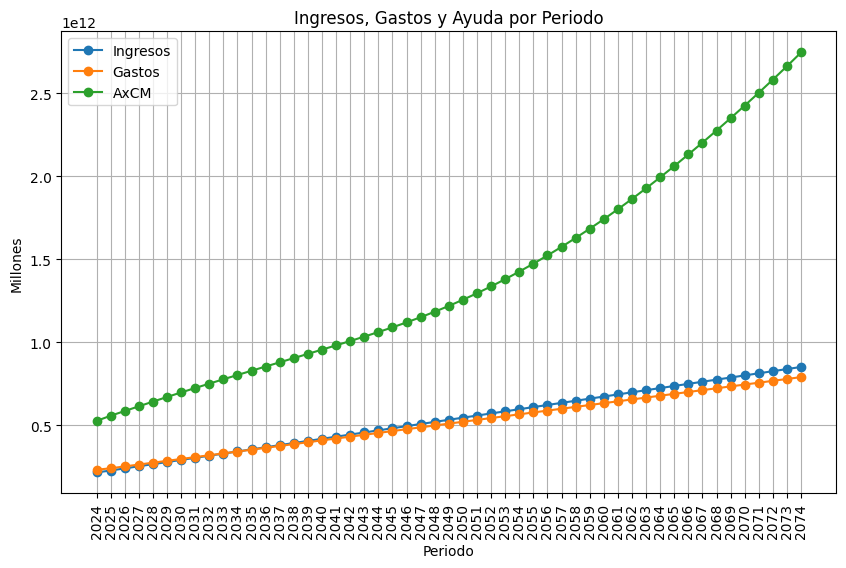

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df["Periodo"], df["Ingresos_dec"], marker='o', label="Ingresos")
plt.plot(df["Periodo"], df["Gastos_dec"], marker='o', label="Gastos")
plt.plot(df["Periodo"], df["AxCM"], marker='o', label="AxCM")

plt.title("Ingresos, Gastos y Ayuda por Periodo")
plt.xlabel("Periodo")
plt.ylabel("Millones")
plt.xticks(df["Periodo"], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df2=df.copy()

print(df2.columns.tolist())

['Periodo', 'Total_num', 'Total afiliados', 'Cotizacion_media', 'Ingresos_dec', 'Gastos_dec', 'ayuda', 'AxCM']


In [22]:
df2.columns = df2.columns.str.strip()

inicio_efecto = 2027

df2["productividad"] = 1.0
df2.loc[df["Periodo"] >= inicio_efecto, "productividad"] = 1.15 ** ((df2["Periodo"] - inicio_efecto) / 10)

df2["Total_afiliados_ajustado"] = df2["Total afiliados"]
df2.loc[df2["Periodo"] >= inicio_efecto, "Total_afiliados_ajustado"] = df2["Total afiliados"] * (0.98 ** ((df2["Periodo"] - inicio_efecto)/10))

df2["Ingresos_ajustados"] = df2["Ingresos_dec"] * df2["productividad"] * (df2["Total_afiliados_ajustado"] / df2["Total afiliados"])

print(df2[["Periodo", "productividad", "Total_afiliados_ajustado", "Ingresos_ajustados"]])



    Periodo  productividad  Total_afiliados_ajustado  Ingresos_ajustados
0      2024       1.000000              1.942978e+07        2.160956e+11
1      2025       1.000000              1.991942e+07        2.279451e+11
2      2026       1.000000              2.026533e+07        2.406780e+11
3      2027       1.000000              2.056504e+07        2.534109e+11
4      2028       1.014074              2.078078e+07        2.693450e+11
5      2029       1.028347              2.094962e+07        2.856256e+11
6      2030       1.042820              2.106440e+07        3.022590e+11
7      2031       1.057497              2.112910e+07        3.192511e+11
8      2032       1.072381              2.115715e+07        3.366083e+11
9      2033       1.087474              2.115285e+07        3.543368e+11
10     2034       1.102779              2.111470e+07        3.724431e+11
11     2035       1.118300              2.104932e+07        3.909337e+11
12     2036       1.134039              2.096062e+0

C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12368\2557088474.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[20565043.         20780784.75188736 20949616.96199665 21064399.9610511
 21129096.25264484 21157146.1313043  21152849.76804469 21114703.68800506
 21049321.30133555 20960617.01455082 20850968.04       20725828.41080233
 20585292.10965753 20434758.54725817 20274103.15531138 20107853.52127592
 19938449.33377541 19772607.59019034 19612510.09617723 19465108.61460124
 19330435.6336     19211320.82336335 19108012.94982561 19021917.27503807
 18950117.45376152 18891550.45553979 18844695.60993757 18807477.94702143
 18777152.89140617 18752180.43177034 18731327.414744   18713155.41400993
 18694718.93266102 18678361.20879222 18665310.50434113 18653898.60764942
 18642002.04835833 18626956.7455579  18610129.23518438 18587558.90730724
 18557341.7675576  18521382.74069743 18479821.53450364 18429991.4779314

In [23]:
df2.head()

,Periodo,Total_num,Total afiliados,Cotizacion_media,Ingresos_dec,Gastos_dec,ayuda,AxCM,productividad,Total_afiliados_ajustado,Ingresos_ajustados
0,2024,3.231814e+07,19429775,27111.60,2.160956e+11,2.324540e+11,-3.106767e+11,5.267723e+11,1.000000,1.942978e+07,2.160956e+11
1,2025,3.282107e+07,19919422,28006.28,2.279451e+11,2.413293e+11,-3.299239e+11,5.578689e+11,1.000000,1.991942e+07,2.279451e+11
2,2026,3.328635e+07,20265334,28930.49,2.406780e+11,2.525402e+11,-3.456081e+11,5.862860e+11,1.000000,2.026533e+07,2.406780e+11
3,2027,3.369152e+07,20565043,29885.20,2.534109e+11,2.637511e+11,-3.611795e+11,6.145904e+11,1.000000,2.056504e+07,2.534109e+11
4,2028,3.403625e+07,20822810,30871.41,2.661439e+11,2.749620e+11,-3.766856e+11,6.428295e+11,1.014074,2.078078e+07,2.693450e+11


In [24]:
df2.to_csv(r"C:\Users\GPSantana\Downloads\modelo_ajustado.csv", index=False)

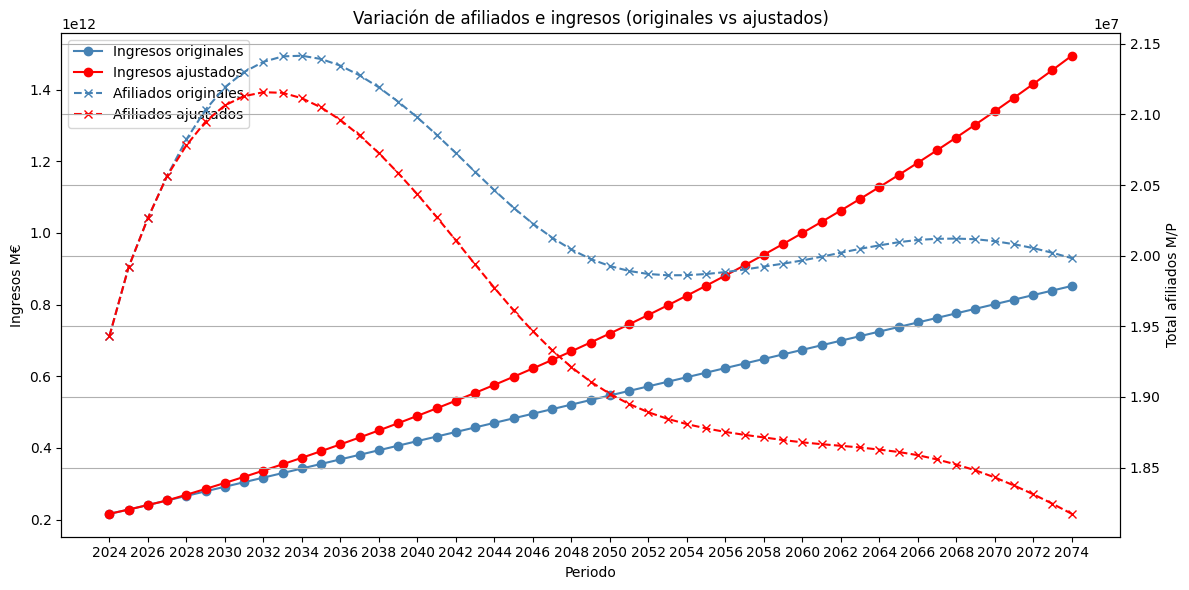

In [ ]:
plt.figure(figsize=(12,6))

ax1 = plt.gca()
line1, = ax1.plot(df2["Periodo"], df2["Ingresos_dec"],color='steelblue', marker='o', label="Ingresos originales")
line2, = ax1.plot(df2["Periodo"], df2["Ingresos_ajustados"],color='red', marker='o', label="Ingresos ajustados")

ax2 = ax1.twinx()
line3, = ax2.plot(df2["Periodo"], df2["Total afiliados"], color='steelblue', marker='x', linestyle='--', label="Afiliados originales")
line4, = ax2.plot(df2["Periodo"], df2["Total_afiliados_ajustado"], color='red', marker='x', linestyle='--', label="Afiliados ajustados")


ax1.set_title("Variación de afiliados e ingresos (originales vs ajustados)")
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Ingresos M€")
ax2.set_ylabel("Total afiliados M/P")

plt.xticks(df2["Periodo"][::2], rotation=90, fontsize=8) 
plt.tight_layout()
plt.grid(True)

lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')


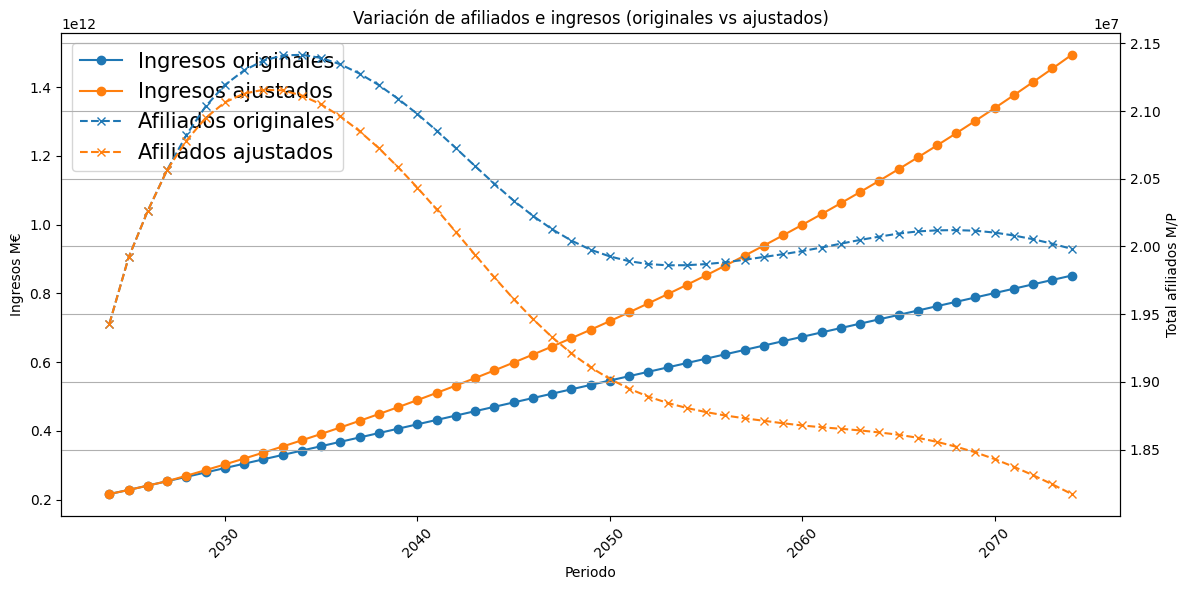

In [ ]:
plt.figure(figsize=(12,6))

ax1 = plt.gca()
line1, = ax1.plot(df2["Periodo"], df2["Ingresos_dec"], marker='o', label="Ingresos originales")
line2, = ax1.plot(df2["Periodo"], df2["Ingresos_ajustados"], marker='o', label="Ingresos ajustados")

ax2 = ax1.twinx()
line3, = ax2.plot(df2["Periodo"], df2["Total afiliados"], marker='x', linestyle='--', label="Afiliados originales")
line4, = ax2.plot(df2["Periodo"], df2["Total_afiliados_ajustado"], marker='x', linestyle='--', label="Afiliados ajustados")

plt.setp(ax1.get_xticklabels(), rotation=45)

ax1.set_title("Variación de afiliados e ingresos (originales vs ajustados)")
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Ingresos M€")
ax2.set_ylabel("Total afiliados M/P")

plt.tight_layout()
plt.grid(True)

lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left',fontsize=15)

plt.show()


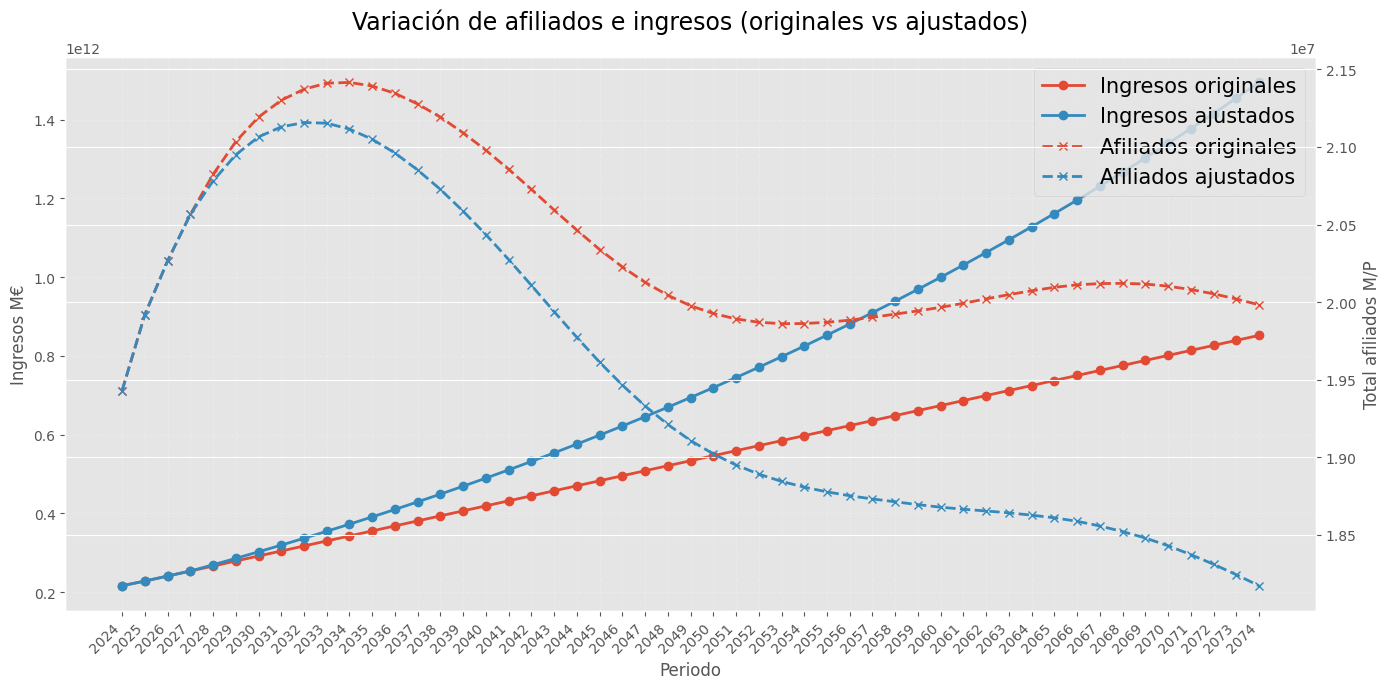

In [ ]:

plt.style.use("ggplot")

fig, ax1 = plt.subplots(figsize=(14,7))

l1, = ax1.plot(
    df2["Periodo"], df2["Ingresos_dec"],
    marker='o', linewidth=2, markersize=6,
    label="Ingresos originales"
)

l2, = ax1.plot(
    df2["Periodo"], df2["Ingresos_ajustados"],
    marker='o', linewidth=2, markersize=6,
    label="Ingresos ajustados"
)

ax1.set_xlabel("Periodo", fontsize=12)
ax1.set_ylabel("Ingresos M€", fontsize=12)

ax2 = ax1.twinx()

l3, = ax2.plot(
    df2["Periodo"], df2["Total afiliados"],
    linestyle='--', marker='x', linewidth=2,
    label="Afiliados originales"
)

l4, = ax2.plot(
    df2["Periodo"], df2["Total_afiliados_ajustado"],
    linestyle='--', marker='x', linewidth=2,
    label="Afiliados ajustados"
)

ax2.set_ylabel("Total afiliados M/P", fontsize=12)

plt.title("Variación de afiliados e ingresos (originales vs ajustados)", fontsize=17, pad=20)

plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_xticks(df2["Periodo"]) 

lines = [l1, l2, l3, l4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=15, frameon=True)

ax1.grid(True, which='major', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()


In [28]:
df_filtrado2 = proyeccion[(proyeccion['Edad_num'] >= 65)]

df_filtrado2

,Sexo,Edad,Periodo,Total,Total_num,Edad_num
3366,Total,65,2074,"784.130,050198",784130.050198,65.0
3367,Total,65,2073,"766.310,759332",766310.759332,65.0
3368,Total,65,2072,"760.715,74445",760715.744450,65.0
3369,Total,65,2071,"750.447,544275",750447.544275,65.0
3370,Total,65,2070,"744.858,184713",744858.184713,65.0
...,...,...,...,...,...,...
15550,Mujeres,99,2028,"11.848,940732",11848.940732,99.0
15551,Mujeres,99,2027,"10.630,785422",10630.785422,99.0
15552,Mujeres,99,2026,"10.212,270909",10212.270909,99.0
15553,Mujeres,99,2025,"9.445,622279",9445.622279,99.0


In [29]:
df_total2 = df_filtrado2[df_filtrado2["Sexo"] == "Total"]

total_por_periodo2 = df_total2.groupby("Periodo")["Total_num"].sum().reset_index()

total_por_periodo2

,Periodo,Total_num
0,2024,9.910452e+06
1,2025,1.017011e+07
2,2026,1.044350e+07
3,2027,1.070894e+07
4,2028,1.098179e+07
5,2029,1.126764e+07
6,2030,1.157858e+07
7,2031,1.187200e+07
8,2032,1.216347e+07
9,2033,1.246351e+07


In [30]:
pensiones = pd.read_excel(r"C:\Users\GPSantana\Downloads\Evolucion_pensiones1.xls", header=3)

pensiones.head()

,PERIODO,Unnamed: 1,INCAPACIDAD PERMANENTE,JUBILACIÓN,VIUDEDAD,ORFANDAD,F. FAMILIAR,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,936666,5686678.0,2358932.0,339166.0,39357.0,9360799.0
2,2016,NaN,944600,5784748.0,2364388.0,339471.0,40275.0,9473482.0
3,2017,NaN,951871,5884135.0,2365468.0,339052.0,41244.0,9581770.0
4,2018,NaN,955269,5994755.0,2365497.0,338470.0,42281.0,9696272.0


In [31]:
pensiones=pensiones.drop("Unnamed: 1", axis=1)

pensiones = pensiones.drop(pensiones.index[0])

pensiones["PERIODO"] = pd.to_numeric(pensiones["PERIODO"], errors="coerce")

pensiones=pensiones[["PERIODO","TOTAL"]]


In [32]:
pensiones

,PERIODO,TOTAL
1,2015.0,9360799.0
2,2016.0,9473482.0
3,2017.0,9581770.0
4,2018.0,9696272.0
5,2019.0,9801379.0
...,...,...
71,NaN,NaN
72,NaN,NaN
73,NaN,NaN
74,NaN,NaN


In [33]:

pensiones=pensiones.dropna()

pensiones["PERIODO"] = pensiones["PERIODO"].astype(int)

pensiones=pensiones.rename(columns={"PERIODO": "Periodo","TOTAL":"Pensionistas"})

pensiones=pensiones.loc[3:24]

pensiones = pensiones.drop(index=12)

pensiones = pensiones.reset_index(drop=True)

pensiones


C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12368\1765449129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pensiones["PERIODO"] = pensiones["PERIODO"].astype(int)


,Periodo,Pensionistas
0,2017,9581770.0
1,2018,9696272.0
2,2019,9801379.0
3,2020,9809019.0
4,2021,9916966.0
5,2022,9994836.0
6,2023,10111991.0
7,2024,10281477.0
8,2025,10294786.0


In [34]:
df_merged2 = (
    total_por_periodo2
    .merge(pensiones, on="Periodo", how="left")
)

df_merged2

,Periodo,Total_num,Pensionistas
0,2024,9.910452e+06,10281477.0
1,2025,1.017011e+07,10294786.0
2,2026,1.044350e+07,NaN
3,2027,1.070894e+07,NaN
4,2028,1.098179e+07,NaN
5,2029,1.126764e+07,NaN
6,2030,1.157858e+07,NaN
7,2031,1.187200e+07,NaN
8,2032,1.216347e+07,NaN
9,2033,1.246351e+07,NaN


In [35]:
gasto_pens=pd.read_csv(r"C:\Users\GPSantana\Downloads\evolucion_del_gasto_en_pensiones_en_españa_.csv",sep=';')

gasto_pens.head()

,Año,Periodo,Gasto total en pensiones
0,2017,Julio,"8.770,70"
1,2017,Agosto,"8.790,61"
2,2017,Septiembre,"8.807,29"
3,2017,Octubre,"8.831,64"
4,2017,Noviembre,"8.857,95"


In [36]:
gasto_pens["Gasto total en pensiones"] = (
    gasto_pens["Gasto total en pensiones"]
    .str.replace(".", "", regex=False) 
    .str.replace(",", ".", regex=False) 
    .astype(float)
)


gasto_anual = gasto_pens.groupby("Año", as_index=False).agg(
    Gasto_total_pensiones=("Gasto total en pensiones", "sum")
)

gasto_anual = gasto_anual[gasto_anual["Gasto_total_pensiones"] != 0]

gasto_anual["Gasto_total_pensiones"] = gasto_anual["Gasto_total_pensiones"] * 1_000_000

gasto_anual

,Año,Gasto_total_pensiones
0,2017,5.293922e+10
1,2018,1.090841e+11
2,2019,1.157708e+11
3,2020,1.186820e+11
4,2021,1.222725e+11
5,2022,1.300359e+11
6,2023,1.441091e+11
7,2024,1.534959e+11
8,2025,1.355154e+11


In [37]:
gasto_anual=gasto_anual.rename(columns={"Año": "Periodo"})

gasto_anual["Periodo"] = pd.to_numeric(gasto_anual["Periodo"], errors="coerce")

gasto_anual

,Periodo,Gasto_total_pensiones
0,2017,5.293922e+10
1,2018,1.090841e+11
2,2019,1.157708e+11
3,2020,1.186820e+11
4,2021,1.222725e+11
5,2022,1.300359e+11
6,2023,1.441091e+11
7,2024,1.534959e+11
8,2025,1.355154e+11


In [38]:
pension_media={
    2025: 1497.95,
    2024: 1434.88,
    2023: 1368.31,
    2022: 1245.90,
    2021: 1182.07,
    2020: 1093.66,
    2019: 1076.13,
    2018: 1019.57,
    2017: 997.12
}

gasto_anual["Pension_media"] = gasto_anual["Periodo"].map(pension_media)

df_merged2 = (
    df_merged2
    .merge(gasto_anual, on="Periodo", how="left")
)

df_merged2

,Periodo,Total_num,Pensionistas,Gasto_total_pensiones,Pension_media
0,2024,9.910452e+06,10281477.0,1.534959e+11,1434.88
1,2025,1.017011e+07,10294786.0,1.355154e+11,1497.95
2,2026,1.044350e+07,NaN,NaN,NaN
3,2027,1.070894e+07,NaN,NaN,NaN
4,2028,1.098179e+07,NaN,NaN,NaN
5,2029,1.126764e+07,NaN,NaN,NaN
6,2030,1.157858e+07,NaN,NaN,NaN
7,2031,1.187200e+07,NaN,NaN,NaN
8,2032,1.216347e+07,NaN,NaN,NaN
9,2033,1.246351e+07,NaN,NaN,NaN


In [39]:
df3 = df_merged2.copy()

ratio = (df3['Pensionistas'] / df3['Total_num']).mean()
tasa = 0.9025423458587228 / 100  
limite = 0.95 
for i in range(1, len(df3)):
    if np.isnan(df3.loc[i, 'Pensionistas']):
        
        crecimiento = df3.loc[i-1, 'Pensionistas'] * (1 + tasa)
        
        
        ajuste_ratio = df3.loc[i, 'Total_num'] * ratio
        
        
        nuevo_valor = (crecimiento + ajuste_ratio) / 2
        df3.loc[i, 'Pensionistas'] = min(nuevo_valor, df3.loc[i, 'Total_num'] * limite)


df3['Pensionistas'] = df3['Pensionistas'].round().astype(int)



df3

,Periodo,Total_num,Pensionistas,Gasto_total_pensiones,Pension_media
0,2024,9.910452e+06,10281477,1.534959e+11,1434.88
1,2025,1.017011e+07,10294786,1.355154e+11,1497.95
2,2026,1.044350e+07,9921325,NaN,NaN
3,2027,1.070894e+07,10173497,NaN,NaN
4,2028,1.098179e+07,10432699,NaN,NaN
5,2029,1.126764e+07,10704254,NaN,NaN
6,2030,1.157858e+07,10999647,NaN,NaN
7,2031,1.187200e+07,11278401,NaN,NaN
8,2032,1.216347e+07,11555296,NaN,NaN
9,2033,1.246351e+07,11840335,NaN,NaN


In [40]:
tasa

0.009025423458587228

In [41]:
df_merged2["Crecimiento_pensiones"] = df_merged2["Pension_media"].pct_change() * 100
media_crec_pens=df_merged2["Crecimiento_pensiones"].mean()

print(media_crec_pens)

0.08790979036574464


C:\Users\GPSantana\AppData\Local\Temp\ipykernel_12368\2831970167.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged2["Crecimiento_pensiones"] = df_merged2["Pension_media"].pct_change() * 100


In [42]:
X = np.array(list(pension_media.keys())).reshape(-1, 1)
y = np.array(list(pension_media.values()))

model = LinearRegression()
model.fit(X, y)

mask = df3['Pension_media'].isna()
df3.loc[mask, 'Pension_media'] = model.predict(df3.loc[mask, 'Periodo'].values.reshape(-1, 1))

df3

,Periodo,Total_num,Pensionistas,Gasto_total_pensiones,Pension_media
0,2024,9.910452e+06,10281477,1.534959e+11,1434.880000
1,2025,1.017011e+07,10294786,1.355154e+11,1497.950000
2,2026,1.044350e+07,9921325,NaN,1544.997500
3,2027,1.070894e+07,10173497,NaN,1611.428333
4,2028,1.098179e+07,10432699,NaN,1677.859167
5,2029,1.126764e+07,10704254,NaN,1744.290000
6,2030,1.157858e+07,10999647,NaN,1810.720833
7,2031,1.187200e+07,11278401,NaN,1877.151667
8,2032,1.216347e+07,11555296,NaN,1943.582500
9,2033,1.246351e+07,11840335,NaN,2010.013333


In [ ]:
df3["Gastos_dec"] = df3["Periodo"].map(gastos_decl)
X = np.array(list(gastos_decl.keys())).reshape(-1, 1)
y = np.array(list(gastos_decl.values()))

model = LinearRegression()
model.fit(X, y)

mask = df3['Gastos_dec'].isna()
df3.loc[mask, 'Gastos_dec'] = model.predict(df3.loc[mask, 'Periodo'].values.reshape(-1, 1))


mask_hist = df3["Gasto_total_pensiones"].notna()

mask_future = df3["Gasto_total_pensiones"].isna()

df3.loc[mask_future, "Gasto_total_pensiones"] = (
    df3.loc[mask_future, "Pensionistas"] * df3.loc[mask_future, "Pension_media"] * 14 
)

df3


,Periodo,Total_num,Pensionistas,Gasto_total_pensiones,Pension_media,Gastos_dec
0,2024,9.910452e+06,10281477,1.534959e+11,1434.880000,-2.324540e+11
1,2025,1.017011e+07,10294786,1.355154e+11,1497.950000,-2.413293e+11
2,2026,1.044350e+07,9921325,2.145979e+11,1544.997500,-2.525402e+11
3,2027,1.070894e+07,10173497,2.295141e+11,1611.428333,-2.637511e+11
4,2028,1.098179e+07,10432699,2.450644e+11,1677.859167,-2.749620e+11
5,2029,1.126764e+07,10704254,2.613985e+11,1744.290000,-2.861730e+11
6,2030,1.157858e+07,10999647,2.788421e+11,1810.720833,-2.973839e+11
7,2031,1.187200e+07,11278401,2.963978e+11,1877.151667,-3.085948e+11
8,2032,1.216347e+07,11555296,3.144214e+11,1943.582500,-3.198057e+11
9,2033,1.246351e+07,11840335,3.331892e+11,2010.013333,-3.310167e+11


In [44]:
df3["Pension_media"]=df3["Pension_media"].round(2)
df3

,Periodo,Total_num,Pensionistas,Gasto_total_pensiones,Pension_media,Gastos_dec
0,2024,9.910452e+06,10281477,1.534959e+11,1434.88,-2.324540e+11
1,2025,1.017011e+07,10294786,1.355154e+11,1497.95,-2.413293e+11
2,2026,1.044350e+07,9921325,2.145979e+11,1545.00,-2.525402e+11
3,2027,1.070894e+07,10173497,2.295141e+11,1611.43,-2.637511e+11
4,2028,1.098179e+07,10432699,2.450644e+11,1677.86,-2.749620e+11
5,2029,1.126764e+07,10704254,2.613985e+11,1744.29,-2.861730e+11
6,2030,1.157858e+07,10999647,2.788421e+11,1810.72,-2.973839e+11
7,2031,1.187200e+07,11278401,2.963978e+11,1877.15,-3.085948e+11
8,2032,1.216347e+07,11555296,3.144214e+11,1943.58,-3.198057e+11
9,2033,1.246351e+07,11840335,3.331892e+11,2010.01,-3.310167e+11


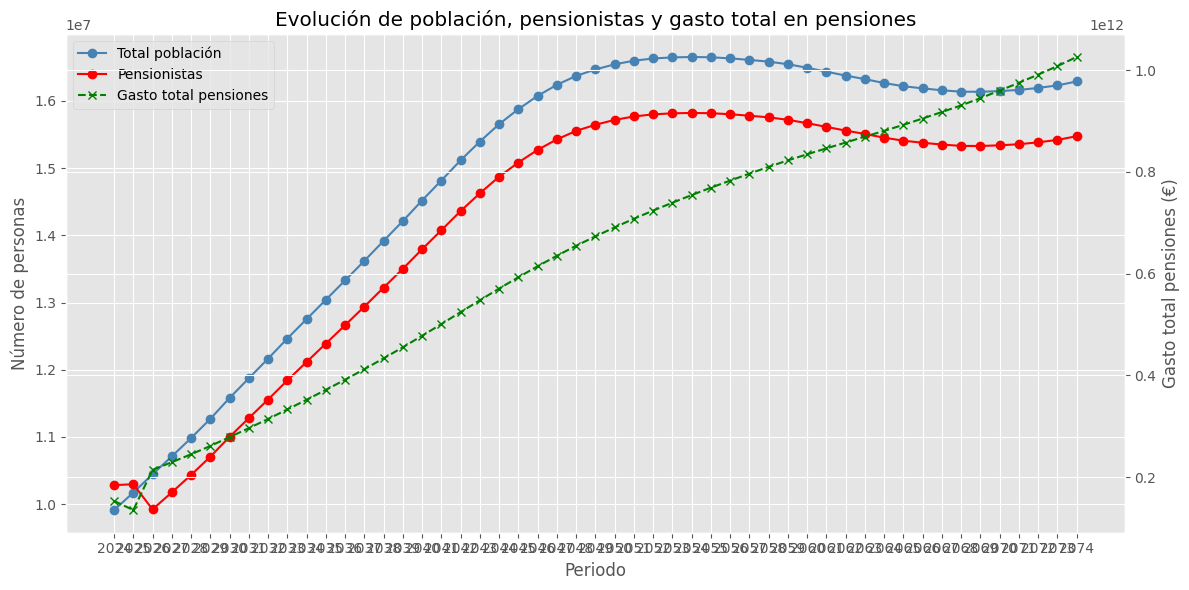

In [ ]:
plt.figure(figsize=(12,6))

# Eje principal: Total_num y Pensionistas
ax1 = plt.gca()
line1, = ax1.plot(df3["Periodo"], df3["Total_num"], color='steelblue', marker='o', label="Total población")
line2, = ax1.plot(df3["Periodo"], df3["Pensionistas"], color='red', marker='o', label="Pensionistas")

# Segundo eje: Gasto_total_pensiones
ax2 = ax1.twinx()
line3, = ax2.plot(df3["Periodo"], df3["Gasto_total_pensiones"], color='green', marker='x', linestyle='--', label="Gasto total pensiones")

# Etiquetas y título
ax1.set_title("Evolución de población, pensionistas y gasto total en pensiones")
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Número de personas")
ax2.set_ylabel("Gasto total pensiones (€)")

# Mejorar etiquetas del eje X
plt.xticks(df3["Periodo"], rotation=90, fontsize=8)
plt.tight_layout()
plt.grid(True)

# Leyenda combinada
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.show()
